In [1]:
import functools
import pandas as pd
import numpy as np
import tqdm
import seaborn as sns
import xarray as xr
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.integrate as scint
import scipy.interpolate as scinterp
xr.set_options(keep_attrs=True)
import cmath

from Functions import *

In [2]:
b=0.01
omega0 = np.sqrt(lambda_355 * b / (2* np.pi))
zR = b / 2     # [m] Rayleigh Range



pulse_params = {'b' : b,            # [m] confocal parameter
            'energy' : 0.017,       # [J] single pulse energy
            'duration' : 7e-9,
            'PXe':1000}     # [s] single pulse length

harm_params = {'alpha' : 8.20839154e-48,
            'chi3' : 1.5e-35}

zstart = -0.2
zstop = 0.2
zsamples = 1000
zrange = (zstart, zstop)
z = np.array(np.linspace(zstart, zstop, zsamples,dtype = np.longdouble))

rstop = 10*omega0
rsamples = 1000
r = np.linspace(0,rstop,rsamples,dtype = np.longdouble)


sol_params_WA = {'func': curly_GBWA,
              'initial_vals': (nonzero, nonzero),
              'zstart': zstart,
              'zstop': zstop,
              'zsamples': zsamples,
              'z': z,
              'r': r,
              'rstop': rstop,
              'rsamples': rsamples}

params_WA = {**pulse_params, **harm_params, **sol_params_WA}


In [3]:
single_func = functools.partial(calc_118_and_fluor,
                                zrange=zrange,
                                init_vals=[1e-10,1e-10,1e-10],
                                t_eval=z)

In [4]:
bsamples = 10000
brange = (0.01, 3) # confocal perameter [m]
bs = np.linspace(brange[0], brange[1], bsamples)
bscan = xr.DataArray(bs,
                     dims = 'b',
                     attrs = {'units': 'm',
                              'long_name': "Confocal parameter"})
single_func = functools.partial(calc_118_and_fluor,
                                zrange=zrange,
                                init_vals=[1e-10,1e-10,1e-10],
                                t_eval=z)

B_scan = scan_builder(single_func, params_WA, [bscan])

In [5]:
scanned_WA = B_scan(params=params_WA)

0.01
0.0102990299029903
0.010598059805980598
0.010897089708970898
0.011196119611961196
0.011495149514951496
0.011794179417941794
0.012093209320932094
0.012392239223922392
0.012691269126912692
0.01299029902990299
0.01328932893289329
0.01358835883588359
0.013887388738873888
0.014186418641864186
0.014485448544854486
0.014784478447844786
0.015083508350835084
0.015382538253825382
0.015681568156815682
0.01598059805980598
0.016279627962796278
0.016578657865786578
0.016877687768776878
0.017176717671767178
0.017475747574757478
0.017774777477747777
0.018073807380738074
0.018372837283728374
0.01867186718671867
0.01897089708970897
0.01926992699269927
0.01956895689568957
0.01986798679867987
0.02016701670167017
0.02046604660466047
0.020765076507650766
0.021064106410641065
0.021363136313631362
0.02166216621662166
0.02196119611961196
0.02226022602260226
0.02255925592559256
0.02285828582858286
0.023157315731573157
0.023456345634563457
0.023755375537553754
0.024054405440544054
0.024353435343534353
0.024

In [6]:
print(np.where(scanned_WA.data[:,0] == max(scanned_WA.data[:,0]))[0][0])

1302


In [14]:
print(scanned_WA.b.data[1302])

0.39933693369336937


(0.0, 1e+30)

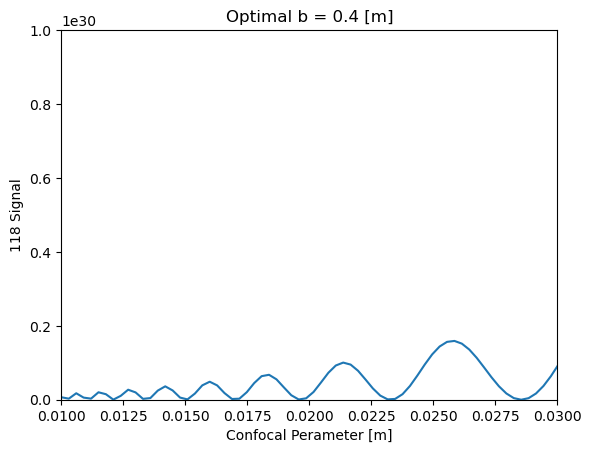

In [28]:
plt.plot(scanned_WA.b.data,scanned_WA.data[:,0])
plt.xlabel('Confocal Perameter [m]')
plt.ylabel('118 Signal')
plt.title('Optimal b = 0.4 [m]')
plt.xlim(0.01,0.03)
plt.ylim(0,1e30)

In [9]:
b=0
omega0 = np.sqrt(lambda_355 * b / (2* np.pi))
zR = b / 2     # [m] Rayleigh Range



pulse_params = {'b' : b,            # [m] confocal parameter
            'energy' : 0.017,       # [J] single pulse energy
            'duration' : 7e-9,
            'PXe':1000}     # [s] single pulse length

harm_params = {'alpha' : 8.20839154e-48,
            'chi3' : 1.5e-35}

zstart = -0.2
zstop = 0.2
zsamples = 1000
zrange = (zstart, zstop)
z = np.array(np.linspace(zstart, zstop, zsamples,dtype = np.longdouble))

rstop = 10*omega0
rsamples = 1000
r = np.linspace(0,rstop,rsamples,dtype = np.longdouble)


sol_params_NA = {'func': curly_GBNA,
              'initial_vals': (nonzero, nonzero),
              'zstart': zstart,
              'zstop': zstop,
              'zsamples': zsamples,
              'z': z,
              'r': r,
              'rstop': rstop,
              'rsamples': rsamples}

params_NA = {**pulse_params, **harm_params, **sol_params_NA}

bsamples = 10000
brange = (0.001, 3) # confocal perameter [m]
bs = np.linspace(brange[0], brange[1], bsamples)
bscan = xr.DataArray(bs,
                     dims = 'b',
                     attrs = {'units': 'm',
                              'long_name': "Confocal parameter"})
single_func = functools.partial(calc_118_and_fluor,
                                zrange=zrange,
                                init_vals=[1e-10,1e-10,1e-10],
                                t_eval=z)

B_scan_NA = scan_builder(single_func, params_NA, [bscan])

In [10]:
scanned = B_scan_NA(params=params_NA)

0.001


d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 4.553197e-08
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 3.924510e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 4.619178e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 4.688023e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 4.891551e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 8.476848e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.

0.0012999299929993


d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.771573e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.542712e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 3.765106e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.578588e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 3.140251e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.552569e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.

0.0015998599859986


d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.103847e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.158472e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 8.833532e-08
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 4.006597e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.046553e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 6.468892e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.

0.0018997899789978997


d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.879981e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.188499e-08
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.709520e-08
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 4.144848e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.055316e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 6.251850e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.

0.0021997199719972


d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.691363e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 4.145542e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 8.866856e-08
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 4.139301e-08
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.487973e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 3.105403e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.

0.0024996499649965


d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.207613e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.297592e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 3.201131e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.603764e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 4.645375e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.165350e-06
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.

0.0027995799579957994


d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.546136e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.544379e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.604187e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.827816e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.486755e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 8.190457e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.

0.0030995099509950994


d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.316785e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 3.056234e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 6.025619e-08
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 4.211983e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 4.004243e-08
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 6.074962e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.

0.0033994399439943993


d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 3.759735e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 3.175407e-08
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 3.897949e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 6.173654e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.934958e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 6.902363e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.

0.0036993699369936993


d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.211274e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.972935e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.486344e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 4.388036e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 4.636479e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.422390e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.

0.003999299929992999


d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.607068e-08
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.279754e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.674463e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.216263e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 5.404166e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 4.146213e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.

0.004299229922992299


d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 8.772149e-08
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.326386e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 5.736564e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.420713e-08
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 3.288581e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 4.115770e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.

0.004599159915991599


d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.223455e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.746730e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.390951e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.666785e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 5.625721e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 5.516854e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.

0.004899089908990899


d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 4.730485e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 5.452092e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 5.502726e-07
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 7.196991e-07
  warnings.warn(


0.005199019901990199


d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 3.812839e-07
  warnings.warn(


0.005498949894989499


d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 2.007490e-07
  warnings.warn(


0.005798879887988799


d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 8.599871e-08
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 9.969886e-08
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 7.549452e-08
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 7.157873e-08
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 1.051099e-07
  warnings.warn(


0.006098809880988099


d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 4.587217e-08
  warnings.warn(
d:\Anaconda\Lib\site-packages\scipy\integrate\_quadrature.py:370: AccuracyWarning: maxiter (500) exceeded. Latest difference = 4.410223e-08
  warnings.warn(


0.006398739873987399
0.0066986698669866986
0.0069985998599859985
0.0072985298529852985
0.0075984598459845985
0.007898389838983898
0.008198319831983197
0.008498249824982498
0.008798179817981797
0.009098109810981098
0.009398039803980397
0.009697969796979698
0.009997899789978996
0.010297829782978298
0.010597759775977596
0.010897689768976898
0.011197619761976196
0.011497549754975498
0.011797479747974796
0.012097409740974098
0.012397339733973396
0.012697269726972698
0.012997199719971996
0.013297129712971298
0.013597059705970596
0.013896989698969898
0.014196919691969196
0.014496849684968498
0.014796779677967796
0.015096709670967098
0.015396639663966396
0.015696569656965694
0.015996499649964996
0.016296429642964294
0.016596359635963596
0.016896289628962897
0.017196219621962196
0.017496149614961497
0.017796079607960796
0.018096009600960097
0.018395939593959396
0.018695869586958697
0.018995799579957996
0.019295729572957297
0.019595659565956595
0.019895589558955897
0.020195519551955195
0.0204954

Text(0.5, 1.0, 'Optimal b = 0.136 [m]')

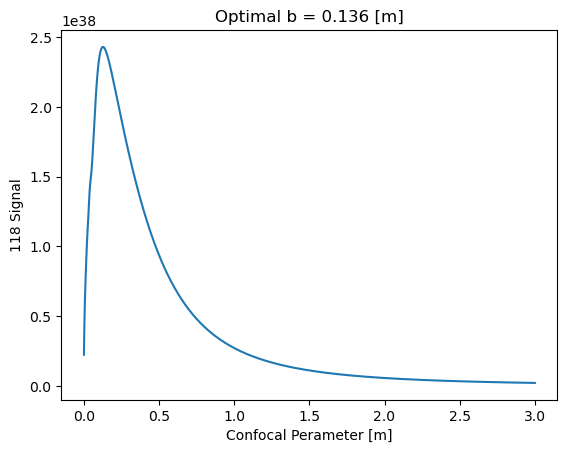

In [17]:
plt.plot(scanned.b.data,scanned.data[:,0])
plt.xlabel('Confocal Perameter [m]')
plt.ylabel('118 Signal')
plt.title('Optimal b = 0.136 [m]')

In [12]:
print(np.where(scanned.data[:,0] == max(scanned.data[:,0]))[0][0])

422


In [15]:
print(scanned_WA.b.data[422])

0.13619061906190622
